# Fireball and Bolide Data Exploration and Cleaning

In [182]:
import pandas as pd
fireball_data = pd.read_csv('../data/cneos_fireball_data.csv')


### **Important Parameters for CNEOS Fireball Data**

**Peak Brightness Date/Time (UT)**\
The date and time in UT (Universal Time) of this event's peak brightness.

**Latitude (deg.)**\
Geodetic latitude in degrees north (N) or south (S) of the equator for this event.

**Longitude (deg.)**\
Geodetic longitude in degrees east (E) or west (W) of the prime meridian for this event.

**Altitude (km)**\
Altitude in kilometers (km) above the reference geoid for this event.

**Velocity (km/s)**\
The magnitude of the meteor's pre-impact velocity in kilometers per second (km/s).

**Velocity Components (km/s)**\
The magnitude of the meteor's pre-impact velocity in a geocentric Earth-fixed reference frame defined as follows: the z-axis is directed along the Earth's rotation axis towards the celestial north pole, the x-axis lies in the Earth's equatorial plane, directed towards the prime meridian, and the y-axis completes the right-handed coordinate system.

**Total Radiated Energy (J)**\
The approximate total radiated energy in the atmosphere in Joules [a unit of energy given in kilograms times velocity squared, or kg × (m/s)2]

**Calculated Total Impact Energy (kt)**\
The impact energy of the event in kilotons of TNT (kt) computed from an empirical expression relating radiated and impact energy.

In [201]:
fireball_data.tail(20)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
983,1995-01-04 04:16:17,46.4,12.1,NaN,NaN,NaN,NaN,NaN,4.100000e+10,0.140
984,1995-01-02 20:41:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+10,0.100
985,1994-12-18 12:45:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+10,0.160
986,1994-12-16 09:41:03,-42.2,27.6,NaN,NaN,NaN,NaN,NaN,5.000000e+10,0.160
987,1994-11-03 20:01:36,6.5,89.0,NaN,NaN,NaN,NaN,NaN,2.350000e+12,5.000
988,1994-11-01 06:50:46,-1.5,-84.5,NaN,NaN,NaN,NaN,NaN,1.000000e+12,2.300
989,1994-10-27 04:21:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.200000e+11,0.850
990,1994-10-20 00:11:21,-45.2,-1.9,NaN,NaN,NaN,NaN,NaN,8.700000e+10,0.270
991,1994-10-08 03:24:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000e+10,0.210
992,1994-09-22 04:22:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700000e+10,0.210


### Exploratory Data Analysis

Null check (pretty bad), will need to fill NAN's with mean or median

In [184]:
# Function to convert to decimal degrees for Folium.Map()
def convert_to_decimal(coord):
    if isinstance(coord, str):
        value, direction = coord[:-1], coord[-1]
        value = float(value)
        if direction in ['S', 'W']:  # South and West are negative
            value = -value #invert
        return value
    return coord

print("Before Conversion:")
print(fireball_data[['Latitude (deg.)', 'Longitude (deg.)']].head())

# converting
fireball_data['Latitude (deg.)'] = fireball_data['Latitude (deg.)'].apply(convert_to_decimal)
fireball_data['Longitude (deg.)'] = fireball_data['Longitude (deg.)'].apply(convert_to_decimal)

print("Converted Data:")
print(fireball_data[['Latitude (deg.)', 'Longitude (deg.)']].head())
print(fireball_data.count())

Before Conversion:
  Latitude (deg.) Longitude (deg.)
0           42.7S           172.4W
1           74.6S             4.4E
2           79.4S            74.6E
3           59.8S            73.6W
4           30.0N           136.0W
Converted Data:
   Latitude (deg.)  Longitude (deg.)
0            -42.7            -172.4
1            -74.6               4.4
2            -79.4              74.6
3            -59.8             -73.6
4             30.0            -136.0
Peak Brightness Date/Time (UT)         1003
Latitude (deg.)                         812
Longitude (deg.)                        812
Altitude (km)                           543
Velocity (km/s)                         325
vx                                      325
vy                                      325
vz                                      325
Total Radiated Energy (J)              1003
Calculated Total Impact Energy (kt)    1003
dtype: int64


In [185]:
fireball_data.isnull().sum()
missing_data = fireball_data.isnull().sum() / len(fireball_data) * 100
print(missing_data)

Peak Brightness Date/Time (UT)          0.000000
Latitude (deg.)                        19.042871
Longitude (deg.)                       19.042871
Altitude (km)                          45.862413
Velocity (km/s)                        67.597208
vx                                     67.597208
vy                                     67.597208
vz                                     67.597208
Total Radiated Energy (J)               0.000000
Calculated Total Impact Energy (kt)     0.000000
dtype: float64


In [186]:
fireball_data.describe()

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,812.000000,812.000000,543.000000,325.000000,325.000000,325.000000,325.000000,1.003000e+03,1003.000000
mean,-1.294150,3.924138,36.583794,18.477846,0.047385,-1.748923,-0.724308,7.203978e+11,1.182897
std,37.650809,103.740918,10.816357,6.148231,11.572601,11.630947,10.546733,1.194681e+13,14.150904
min,-85.000000,-179.700000,14.000000,9.800000,-35.400000,-43.500000,-32.100000,2.000000e+10,0.073000
25%,-31.025000,-83.650000,29.600000,14.300000,-8.500000,-10.000000,-8.500000,3.200000e+10,0.110000
50%,-0.900000,4.250000,35.200000,17.000000,0.100000,-2.300000,0.100000,6.100000e+10,0.200000
75%,28.325000,95.550000,40.700000,20.800000,8.600000,5.900000,7.400000,1.435000e+11,0.420000
max,88.500000,180.000000,74.300000,49.000000,28.100000,31.200000,27.000000,3.750000e+14,440.000000


In [187]:
for col in fireball_data.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(fireball_data[col].value_counts())
    print("\n")

Column: Peak Brightness Date/Time (UT)
2024-12-01 08:50:16    1
2005-08-09 14:35:45    1
2005-12-03 12:45:49    1
2005-12-01 10:40:20    1
2005-11-29 07:33:16    1
                      ..
2015-07-12 22:23:14    1
2015-07-04 01:40:11    1
2015-06-14 03:03:06    1
2015-06-12 17:03:35    1
1988-04-15 03:03:10    1
Name: Peak Brightness Date/Time (UT), Length: 1003, dtype: int64




In [188]:
fireball_data.duplicated().sum()

0

In [189]:
fireball_data.corr()

/var/folders/4f/zfcc0x011ws6dh7frfdd97_m0000gn/T/ipykernel_3799/1517163274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fireball_data.corr()


,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Latitude (deg.),1.000000,-0.059689,-0.030009,0.089301,-0.090043,-0.002236,-0.588201,0.056151,0.056712
Longitude (deg.),-0.059689,1.000000,-0.106068,0.073336,0.107358,-0.512059,-0.059706,0.033253,0.038797
Altitude (km),-0.030009,-0.106068,1.000000,0.249821,-0.075863,0.003721,-0.032208,-0.068750,-0.076473
Velocity (km/s),0.089301,0.073336,0.249821,1.000000,0.024032,-0.120771,-0.113243,-0.000963,-0.001457
vx,-0.090043,0.107358,-0.075863,0.024032,1.000000,-0.099465,-0.002389,0.074180,0.080044
vy,-0.002236,-0.512059,0.003721,-0.120771,-0.099465,1.000000,0.039491,-0.057388,-0.057059
vz,-0.588201,-0.059706,-0.032208,-0.113243,-0.002389,0.039491,1.000000,-0.018277,-0.020221
Total Radiated Energy (J),0.056151,0.033253,-0.068750,-0.000963,0.074180,-0.057388,-0.018277,1.000000,0.998111
Calculated Total Impact Energy (kt),0.056712,0.038797,-0.076473,-0.001457,0.080044,-0.057059,-0.020221,0.998111,1.000000


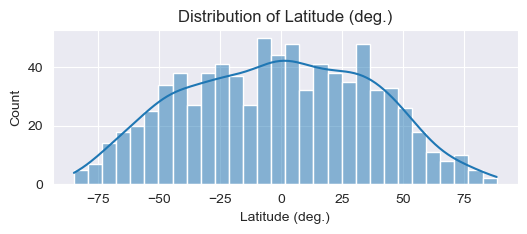

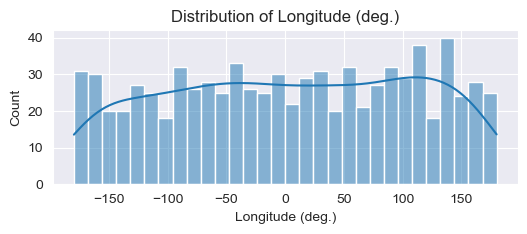

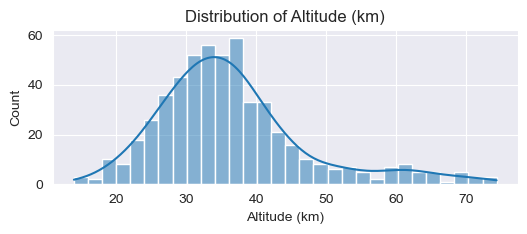

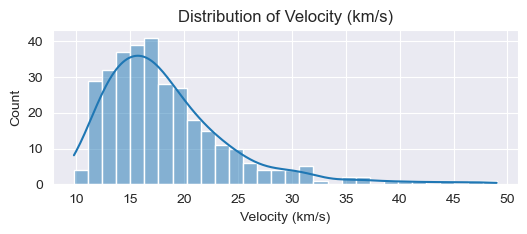

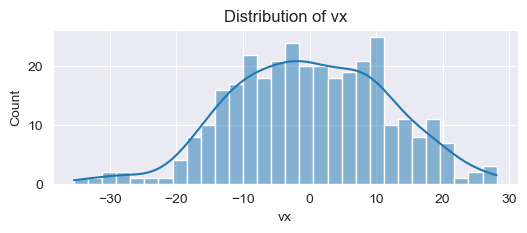

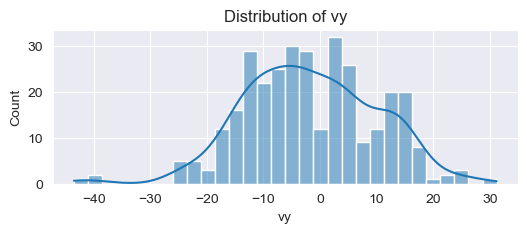

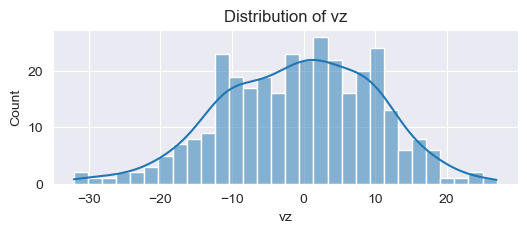

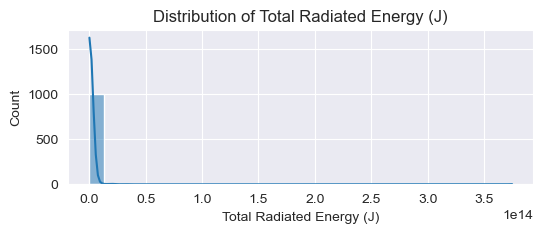

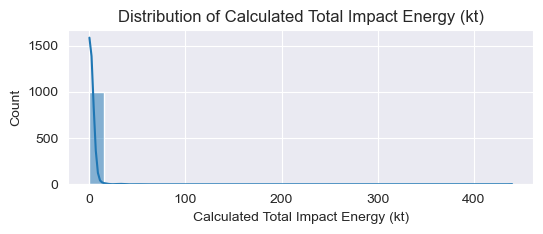

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = fireball_data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(fireball_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

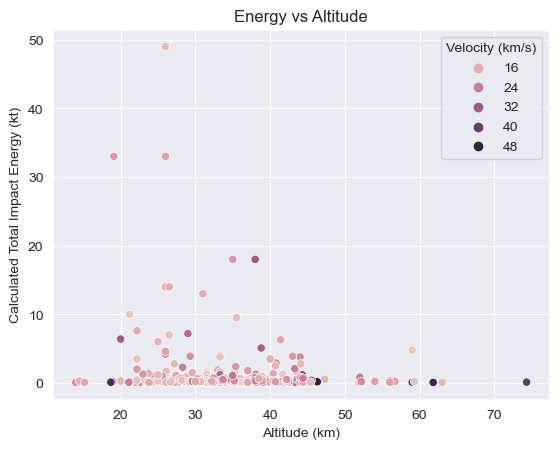

In [191]:
filtered_data = fireball_data[fireball_data['Calculated Total Impact Energy (kt)'] <= 400]

sns.scatterplot(data=filtered_data, x='Altitude (km)', y='Calculated Total Impact Energy (kt)', hue='Velocity (km/s)')
plt.title("Energy vs Altitude")
plt.show()

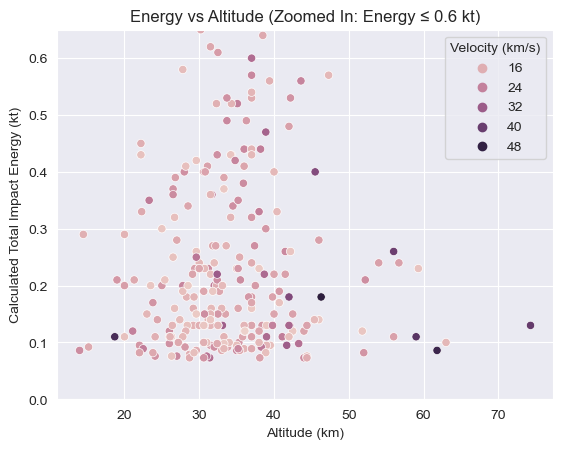

In [192]:
sns.scatterplot(data=filtered_data, x='Altitude (km)', y='Calculated Total Impact Energy (kt)', hue='Velocity (km/s)')
plt.ylim(0, 0.65) # y limiter
plt.title("Energy vs Altitude (Zoomed In: Energy ≤ 0.6 kt)")
plt.show()

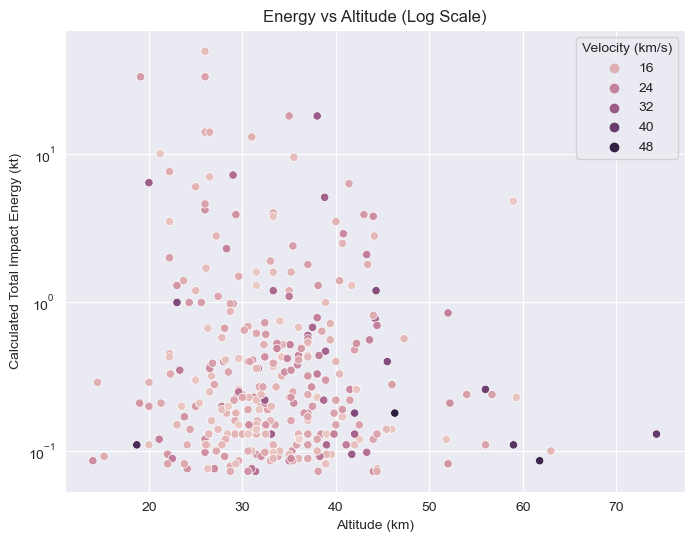

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='Altitude (km)', y='Calculated Total Impact Energy (kt)', hue='Velocity (km/s)')
plt.yscale('log')
plt.title("Energy vs Altitude (Log Scale)")
plt.show()

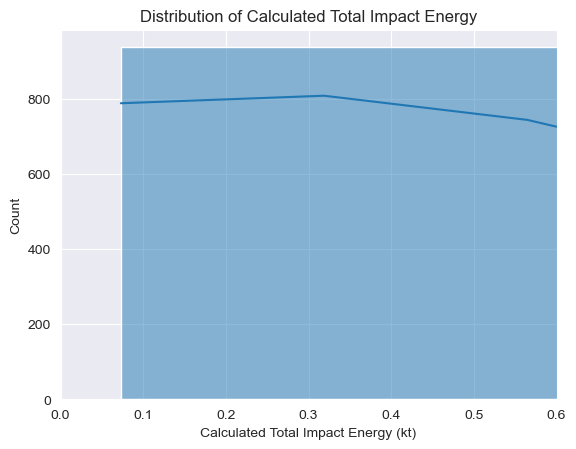

In [194]:
sns.histplot(data=filtered_data, x='Calculated Total Impact Energy (kt)', bins=30, kde=True)
plt.title("Distribution of Calculated Total Impact Energy")
plt.xlim(0, 0.6)
plt.show()

## Cleaning Data

In [195]:
columns_to_interpolate = [
    'Velocity (km/s)', 'vx', 'vy', 'vz',
    'Altitude (km)', 'Longitude (deg.)', 'Latitude (deg.)'
]

# Getting rid of outliers
outlier_condition = fireball_data['Calculated Total Impact Energy (kt)'] > 10
filtered_data = fireball_data[~outlier_condition].copy()

# Interpolating missing values
for column in columns_to_interpolate:
    if column in filtered_data.columns:
        filtered_data[column] = filtered_data[column].interpolate(method='linear')

# combining excluded outliers
excluded_rows = fireball_data[outlier_condition]
combined_data = pd.concat([filtered_data, excluded_rows])


# Verify changes
print(combined_data.info())
print(combined_data.describe())
print(combined_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       1003 non-null   object 
 1   Latitude (deg.)                      1003 non-null   float64
 2   Longitude (deg.)                     1003 non-null   float64
 3   Altitude (km)                        1001 non-null   float64
 4   Velocity (km/s)                      1000 non-null   float64
 5   vx                                   1000 non-null   float64
 6   vy                                   1000 non-null   float64
 7   vz                                   1000 non-null   float64
 8   Total Radiated Energy (J)            1003 non-null   float64
 9   Calculated Total Impact Energy (kt)  1003 non-null   float64
dtypes: float64(9), object(1)
memory usage: 86.2+ KB
None
       Latitude (deg.)  Longitude (deg.)  A

In [196]:
print(filtered_data.count())

Peak Brightness Date/Time (UT)         991
Latitude (deg.)                        991
Longitude (deg.)                       991
Altitude (km)                          991
Velocity (km/s)                        991
vx                                     991
vy                                     991
vz                                     991
Total Radiated Energy (J)              991
Calculated Total Impact Energy (kt)    991
dtype: int64


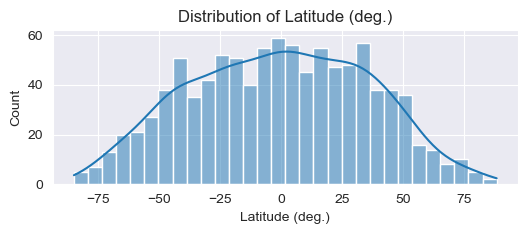

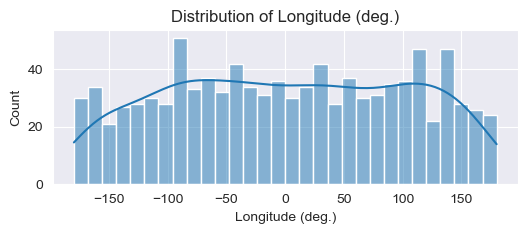

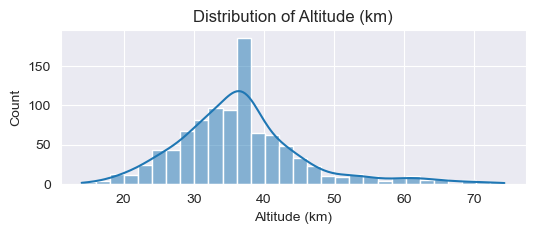

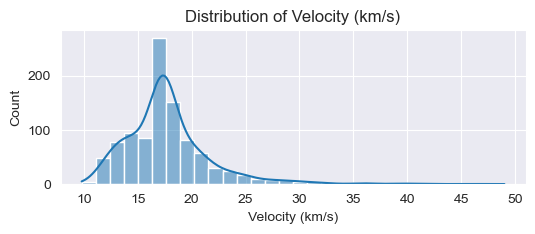

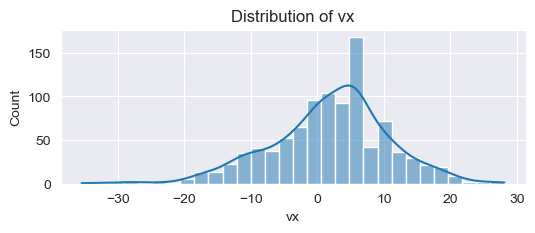

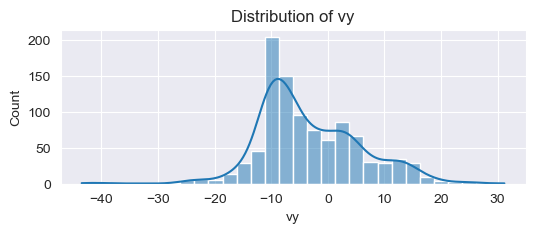

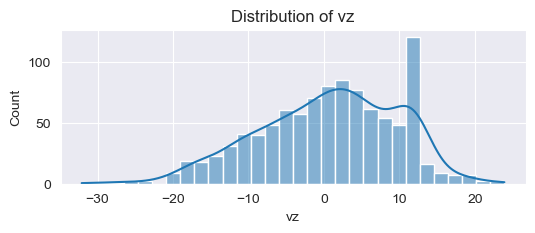

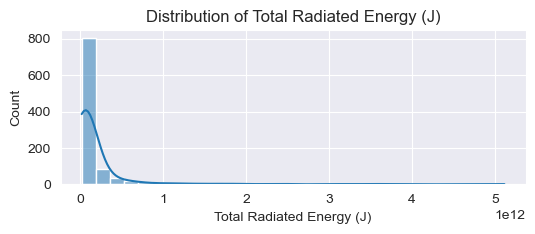

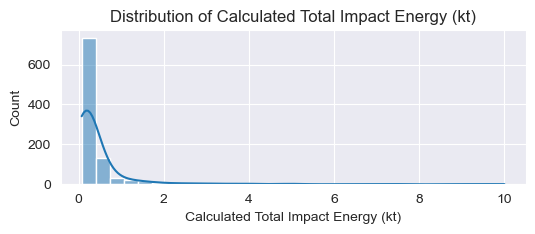

In [197]:
numeric_cols = filtered_data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(filtered_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [200]:
import os

os.makedirs('../data', exist_ok=True)

filtered_data.to_csv('./data/filtered_data.csv', index=False)
combined_data.to_csv('./data/combined_data.csv', index=False)

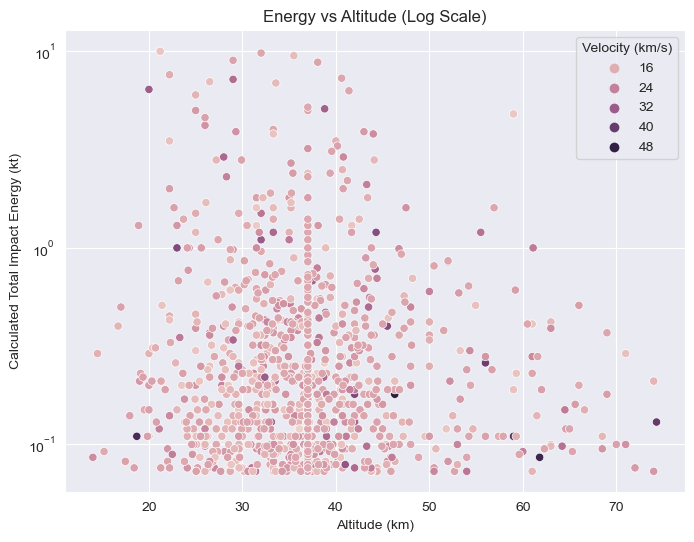

In [199]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='Altitude (km)', y='Calculated Total Impact Energy (kt)', hue='Velocity (km/s)')
plt.yscale('log')
plt.title("Energy vs Altitude (Log Scale)")
plt.show()